In [648]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as pn
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [649]:
full_emb = pd.read_parquet('data/yeast_emb_full.parquet')
vae_emb  = pd.read_parquet('VAE/vae_embeddings.parquet')

In [650]:
# full_emb.describe()

In [651]:
# full_emb.hist(bins=50, figsize=(20, 15))
# plt.suptitle("Embedding Distributions")
# plt.show()

In [652]:
# full_emb.plot(kind="box", figsize=(20, 5), vert=False, showmeans=True)
# plt.title("Embedding Value Ranges (Boxplot)")
# plt.show()

In [653]:
# Read in single mutant fitness data from Constanzo et al. 2016
smf_filter = pd.read_csv('data/smf.csv', index_col = 0)

<Axes: >

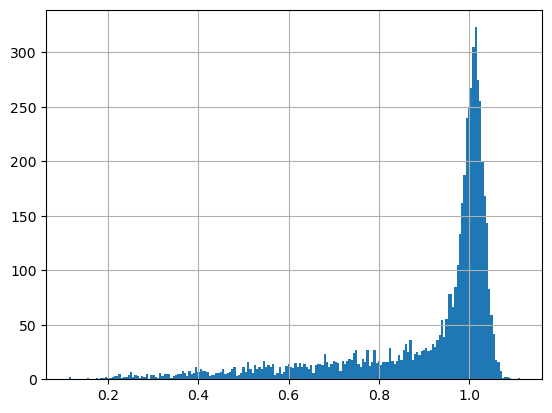

In [654]:
smf_filter.smf_30.hist(bins=200)

In [655]:
full_emb = full_emb.set_index('gene_id')


In [637]:
vae_emb = vae_emb.set_index(full_emb.index)

ValueError: Length mismatch: Expected 3996 rows, received array of length 4437

In [638]:
vae_emb

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.013055,-0.002709,-0.010245,0.043764,0.022315,-0.033037,-0.037638,0.059227,-0.043011,-0.096138,...,-0.000322,0.127143,0.101911,-0.086360,0.059054,-0.080581,-0.049278,0.054129,0.050986,-0.088707
1,-0.026062,-0.004549,0.063299,-0.137503,-0.072808,0.042777,0.098158,-0.136049,0.090754,0.306316,...,-0.007534,-0.380048,-0.285069,0.212637,-0.222145,0.291870,0.141310,-0.155878,-0.184734,0.244832
2,-0.009432,-0.004318,0.012663,-0.002156,-0.001397,0.003492,-0.002885,-0.011909,0.008727,0.015729,...,0.006467,-0.043605,-0.030740,0.012943,-0.019970,0.050249,0.012631,-0.027412,-0.025234,0.010412
3,0.017948,-0.000722,-0.009949,0.030376,0.027441,-0.031412,-0.024003,0.045942,-0.032426,-0.076678,...,-0.001311,0.100834,0.090262,-0.072953,0.068232,-0.082031,-0.045666,0.034313,0.049017,-0.077338
4,0.019017,0.001221,-0.014648,0.046887,0.027926,-0.035425,-0.028902,0.048648,-0.046912,-0.091654,...,0.005140,0.127594,0.109307,-0.084739,0.066540,-0.076632,-0.051140,0.045397,0.052165,-0.088464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4236,0.019133,-0.005419,0.013300,0.013339,0.010885,-0.019773,0.000069,0.021831,-0.011860,0.001787,...,0.016142,0.025095,0.011899,-0.034682,0.022683,-0.034675,-0.022610,-0.002594,0.013444,-0.024677
4237,-0.010098,-0.010814,0.037284,-0.075252,-0.038786,0.024448,0.055708,-0.070539,0.053599,0.176368,...,0.005428,-0.221750,-0.168961,0.117668,-0.112830,0.148680,0.071869,-0.109554,-0.104252,0.132993
4238,0.015982,-0.005022,-0.025020,0.100922,0.058075,-0.056433,-0.082611,0.130261,-0.077554,-0.180022,...,0.005251,0.292156,0.225623,-0.181405,0.154278,-0.214914,-0.117326,0.104433,0.121510,-0.192350
4239,0.001280,-0.005769,0.016629,-0.014246,-0.005982,0.008895,-0.010101,0.003676,0.013520,0.029711,...,0.015338,-0.032765,-0.030961,0.007273,-0.003686,0.018507,-0.001800,0.013255,-0.022698,-0.000559


In [639]:
# PCA on VAE embeddings ?

In [640]:
dims = 128
vae_emb_pca = pd.DataFrame(PCA(n_components=dims).fit_transform(vae_emb.iloc[:,1:]), index=vae_emb.index).reset_index()
vae_emb_pca

,index,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,0,-0.376237,0.036039,-0.035921,-0.002448,0.027459,0.006526,-0.023637,-0.016091,-0.008161,...,-0.000436,0.000538,-0.001539,0.000564,-0.000202,0.000242,0.000181,0.000345,0.000856,-0.000484
1,1,2.592999,-0.034833,0.121956,-0.030629,-0.051694,0.005973,-0.026795,-0.029225,-0.012349,...,-0.000604,-0.000403,0.000554,-0.002718,-0.001108,0.000089,-0.002018,0.000640,-0.001966,0.001165
2,2,0.578222,0.074875,-0.023288,0.043979,-0.008229,0.027993,0.044554,-0.016472,0.013178,...,-0.001154,-0.000918,0.000235,-0.000784,0.001636,-0.000959,-0.000165,0.000147,-0.000515,0.000813
3,3,-0.273307,0.001327,-0.073587,0.009979,-0.009821,-0.005473,0.026206,0.018237,0.001032,...,-0.000120,-0.000597,0.000158,0.000846,0.000182,0.000070,0.000322,0.000748,0.000132,0.000330
4,4,-0.384053,0.032942,-0.040780,-0.006037,-0.012564,0.016141,0.006533,-0.025733,0.002029,...,0.000570,-0.000987,-0.000670,-0.000327,0.000467,-0.001254,0.000493,-0.000443,0.001362,0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4236,0.199648,-0.095227,-0.027631,0.030824,0.004858,0.050380,-0.004294,0.020480,-0.026158,...,-0.001286,-0.000244,0.000547,-0.000263,-0.001625,0.000453,0.000779,-0.000612,-0.000163,0.001015
3992,4237,1.612439,-0.100923,0.055785,0.016321,0.015609,-0.001074,0.031058,-0.000982,-0.008730,...,0.000683,-0.000398,0.000065,-0.000398,0.001151,-0.000355,-0.001459,-0.000298,-0.000119,0.000578
3993,4238,-1.341270,-0.079922,-0.000012,0.035797,-0.030366,0.010376,0.012265,-0.019082,0.000721,...,0.000148,0.000618,-0.000085,0.000275,-0.000244,-0.000709,0.000161,0.000212,-0.000452,0.001182
3994,4239,0.528576,0.039109,-0.013098,0.119979,0.001930,-0.060764,-0.026211,0.011809,0.027673,...,0.000929,0.000447,-0.000391,-0.000875,0.000805,-0.000254,-0.000222,-0.000450,0.000238,-0.000111


In [641]:
dims = 64
full_emb_pca = pd.DataFrame(PCA(n_components=dims).fit_transform(full_emb.iloc[:,1:]), index=full_emb.index).reset_index()
full_emb_pca

,gene_id,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,YAL002W,-1.355819,-4.105847,-1.122794,-1.643528,0.980810,-0.229631,-2.292498,0.984935,-1.162583,...,0.270928,-1.450741,-0.535978,0.601296,-0.243661,-0.659073,-1.143639,0.504795,0.749711,-1.226835
1,YAL008W,-1.303119,-4.543221,2.085259,-5.802387,-0.833813,-0.162083,-2.961626,-0.924664,0.083716,...,-1.002109,0.905604,0.468858,-0.399064,0.530922,0.059886,0.639707,-0.513880,-0.076099,-1.342500
2,YAL009W,-1.846270,0.830126,-2.698978,-3.297608,-1.871000,2.815270,0.793811,0.186406,-3.157364,...,0.537509,-1.210357,1.509637,-1.527603,0.260645,-1.084435,0.598413,-0.175117,-0.666628,0.599011
3,YAL011W,-8.075247,2.901079,-0.732807,-3.399209,2.806912,0.165707,0.936349,0.948217,-0.672949,...,-0.461999,-0.218184,0.880245,1.000705,0.945933,-1.544550,0.572596,0.510422,0.064218,-0.098608
4,YAL012W,15.499366,1.363924,3.007787,2.439256,0.768812,-1.169660,1.919008,4.149540,-1.025276,...,-1.548229,-1.569502,-1.525884,-0.449819,-2.091822,-0.563823,-0.065588,-0.337772,1.075804,-1.280965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,YPR188C,0.106010,-0.043486,-2.660462,-3.915584,-2.994934,3.105467,-0.793190,0.366389,-1.489582,...,0.084158,-0.223323,0.351839,0.103990,-0.321275,1.253091,-0.466839,0.813117,0.352421,0.127330
4433,YPR193C,8.166860,-4.090922,0.700772,0.004500,-1.228085,-0.460280,0.249239,0.748441,1.012720,...,-1.344662,-0.765763,1.271352,0.974277,-1.269910,0.214846,1.264064,0.303962,0.287548,-0.250631
4434,YPR194C,6.349089,-1.025652,0.035315,4.691772,2.358023,0.858826,-2.409085,-3.338499,-2.509758,...,1.145533,0.738297,0.024941,1.116637,1.114577,0.930009,0.204650,0.087433,-0.870055,-0.398824
4435,YPR199C,-6.844981,-1.846239,-0.274569,2.162606,0.188398,-0.422022,-1.877071,-1.533025,0.622675,...,1.636129,1.028014,-0.734806,-0.389626,-0.684832,-0.920086,-0.159740,0.127019,0.803480,-0.064241


In [ ]:
# Split data into train, validation, and test sets
train_embed, temp_embed, train_cond, temp_cond = train_test_split(
    embeddings, conditioning_scaled, test_size=0.3, random_state=42
)

val_embed, test_embed, val_cond, test_cond = train_test_split(
    temp_embed, temp_cond, test_size=0.5, random_state=42
)


In [642]:
# How predictive are sequence features?

A = smf_filter.merge(vae_emb, on='gene_id').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
print('R2: ', lm.score(X_test, y_test))

plt.scatter(lm.predict(X_test), y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.show()

KeyError: 'gene_id'

In [643]:
# Ananlyze what is wrong

In [644]:
def compare_original_and_reconstructed(original_path, reconstructed_path, specific_sample_idx=None):
    """
    Compare original and reconstructed data visually and numerically.

    Parameters:
        original_path (str): Path to the original data file.
        reconstructed_path (str): Path to the reconstructed data file.
        specific_sample_idx (int, optional): Specific sample index to analyze. Default is None.
    """
    # Load data
    original_data = pd.read_parquet(original_path)
    original_data = original_data.set_index('gene_id').values
    reconstructed_data = pd.read_parquet(reconstructed_path).values

    # Compute reconstruction error
    errors = np.mean((original_data - reconstructed_data) ** 2, axis=1)
    print("Mean Reconstruction Error (MSE):", np.mean(errors))

    # Plot error distribution
    plt.hist(errors, bins=50, alpha=0.7, color="blue", edgecolor="black")
    plt.title("Reconstruction Error Distribution")
    plt.xlabel("Reconstruction Error (MSE)")
    plt.ylabel("Frequency")
    plt.grid(axis="y")
    plt.show()

    # Select samples for detailed analysis
    if specific_sample_idx is not None:
        sample_indices = [specific_sample_idx]
    else:
        sample_indices = np.random.choice(len(original_data), size=5, replace=False)

    # Visual comparison and scatter plot
    for idx in sample_indices:
        print(f"Sample {idx}:")
        print("Original (first 5 features):", original_data[idx, :5])
        print("Reconstructed (first 5 features):", reconstructed_data[idx, :5])
        print("Reconstruction Error (MSE):", errors[idx])
        print()

        # Scatter plot of original vs. reconstructed features
        plt.scatter(original_data[idx, :], reconstructed_data[idx, :], alpha=0.6)
        plt.plot([min(original_data[idx, :]), max(original_data[idx, :])], 
                 [min(original_data[idx, :]), max(original_data[idx, :])], 
                 color="red", linestyle="--")
        plt.title(f"Original vs. Reconstructed Features (Sample {idx})")
        plt.xlabel("Original Features")
        plt.ylabel("Reconstructed Features")
        plt.show()

def analyze_latent_space(embeddings_path):
    """
    Analyze the spread of latent space embeddings.

    Parameters:
        embeddings_path (str): Path to the latent embeddings file.
    """
    # Load embeddings
    embeddings = pd.read_parquet(embeddings_path).values

    # Analyze spread
    print("Latent Space Mean (first 5 dimensions):", np.mean(embeddings, axis=0)[:5])
    print("Latent Space Variance (first 5 dimensions):", np.var(embeddings, axis=0)[:5])

    # Visualize latent space distribution
    plt.hist(embeddings.flatten(), bins=50, alpha=0.7, color="green", edgecolor="black")
    plt.title("Latent Space Distribution")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(axis="y")
    plt.show()

Mean Reconstruction Error (MSE): 0.20004447605358602


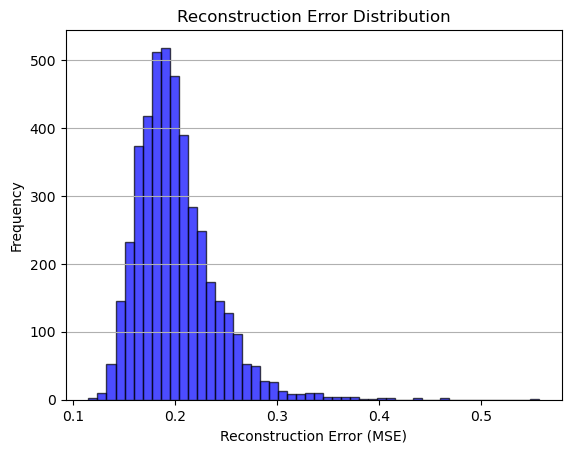

Sample 2172:
Original (first 5 features): [0.38185444 0.31666667 0.38271605 0.07407407 0.        ]
Reconstructed (first 5 features): [ 0.4393438   0.7867172   0.5879024   0.05028661 -0.01825051]
Reconstruction Error (MSE): 0.23287694402959278



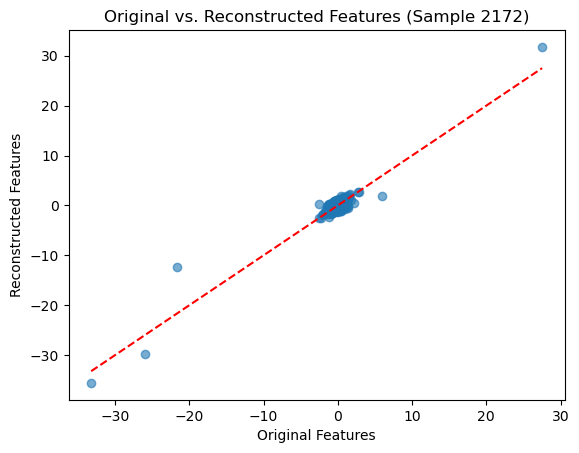

Sample 996:
Original (first 5 features): [0.38484546 0.29666667 0.40623163 0.01587302 0.02645503]
Reconstructed (first 5 features): [ 0.865231   -0.222798    0.73333967 -0.15401849  0.15338549]
Reconstruction Error (MSE): 0.28666616243426823



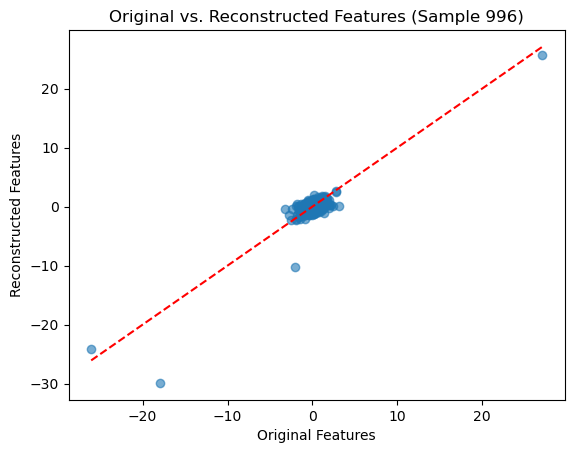

Sample 3510:
Original (first 5 features): [0.39481555 0.34       0.43953733 0.03154574 0.02523659]
Reconstructed (first 5 features): [-0.02368712  0.7948629   0.61051     0.18036085 -0.06368052]
Reconstruction Error (MSE): 0.18383296677304437



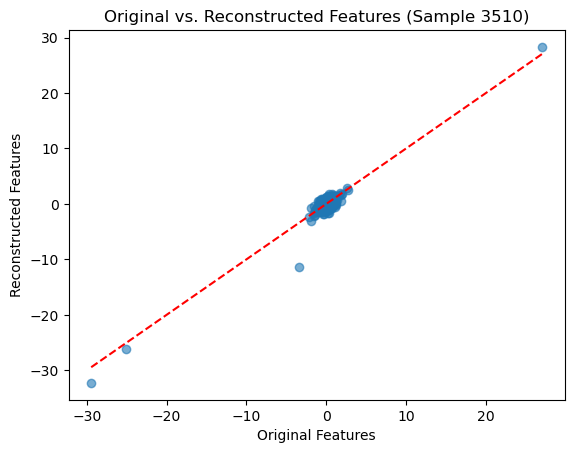

Sample 1999:
Original (first 5 features): [0.38484546 0.32       0.36541144 0.0334728  0.0251046 ]
Reconstructed (first 5 features): [ 0.6918604  -0.0115149   0.81361264  0.26010296  0.32989508]
Reconstruction Error (MSE): 0.18927087644750254



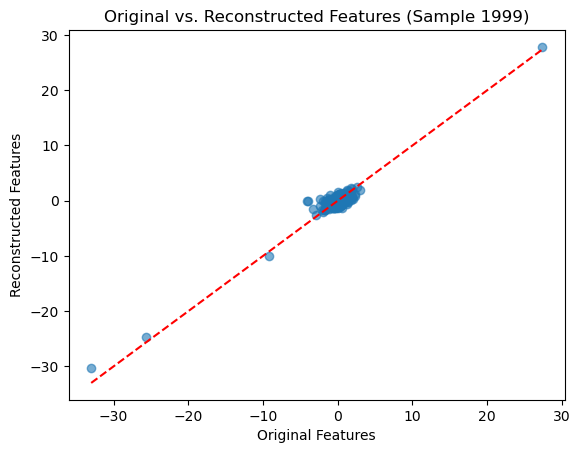

Sample 2370:
Original (first 5 features): [0.37387836 0.32       0.36073059 0.05136986 0.02054795]
Reconstructed (first 5 features): [-0.081747    0.17142908  0.85945344 -0.21733777 -0.10965884]
Reconstruction Error (MSE): 0.18238163144825634



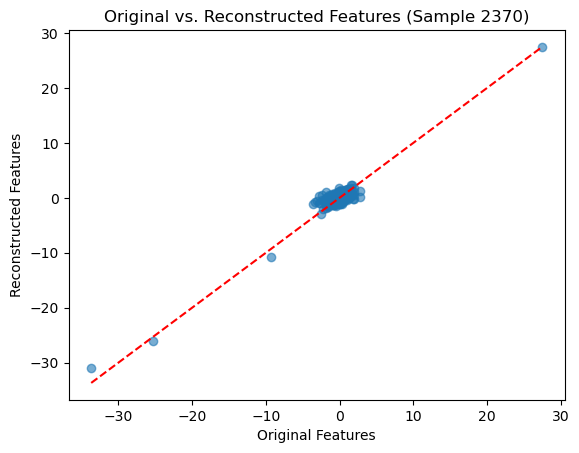

In [629]:
original_path = "data/yeast_emb_full.parquet"  # Original input data
reconstructed_path = "VAE/vae_reconstructed.parquet"  # Reconstructed data
embeddings_path = "VAE/vae_embeddings.parquet"  # Latent space embeddings

# Compare original and reconstructed data
# compare_original_and_reconstructed(original_path, reconstructed_path)

compare_original_and_reconstructed(original_path, reconstructed_path)


# Analyze latent space
# analyze_latent_space(embeddings_path)